In [1]:
# Bid History Analysis - MaxSold Auction Data
# Analysis of bid patterns, timing, proxy bids, and bidding behavior

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

# Load data
print("Loading bid history data...")
bid_path = "/workspaces/maxsold/data/raw_data/bid_history/bid_history_20251201.parquet"
df = pd.read_parquet(bid_path)

print(f"Data loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Loading bid history data...
Data loaded successfully!
Shape: (2107247, 6)
Columns: ['auction_id', 'item_id', 'bid_number', 'time_of_bid', 'amount', 'isproxy']

First few rows:


,auction_id,item_id,bid_number,time_of_bid,amount,isproxy
0,103882,7490316,1,2025-11-30 15:37:18-05:00,6.11,False
1,103882,7490316,2,2025-11-30 12:52:42-05:00,5.11,False
2,103882,7490316,3,2025-11-30 12:52:42-05:00,5.00,True
3,103882,7490316,4,2025-11-29 22:20:15-05:00,4.00,False
4,103882,7490316,5,2025-11-29 16:00:38-05:00,3.00,False


In [2]:
# Data Overview and Basic Statistics
print("="*80)
print("DATA OVERVIEW")
print("="*80)

print(f"\nDataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nColumn names and types:")
print(df.dtypes)

print(f"\nBasic statistics:")
print(df.describe())

print(f"\nMissing values:")
print(df.isnull().sum())

print(f"\nData types:")
for col in df.columns:
    print(f"  {col}: {df[col].dtype}")

DATA OVERVIEW

Dataset shape: 2,107,247 rows × 6 columns

Column names and types:
auction_id                                     object
item_id                                        object
bid_number                                      Int64
time_of_bid    datetime64[us, pytz.FixedOffset(-300)]
amount                                        float64
isproxy                                       boolean
dtype: object

Basic statistics:
       bid_number        amount
count   2107247.0  2.107247e+06
mean    10.203466  3.810233e+01
std     10.566479  1.553759e+02
min           1.0  1.000000e+00
25%           3.0  4.000000e+00
50%           7.0  9.000000e+00
75%          13.0  2.700000e+01
max         157.0  1.400000e+04

Missing values:
auction_id     0
item_id        0
bid_number     0
time_of_bid    0
amount         0
isproxy        0
dtype: int64

Data types:
  auction_id: object
  item_id: object
  bid_number: Int64
  time_of_bid: datetime64[us, pytz.FixedOffset(-300)]
  amount: float

In [3]:
# Data Overview and Basic Statistics
print("="*80)
print("DATA OVERVIEW")
print("="*80)

print(f"\nDataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nColumn names and types:")
print(df.dtypes)

print(f"\nBasic statistics:")
print(df.describe())

print(f"\nMissing values:")
print(df.isnull().sum())

print(f"\nData types:")
for col in df.columns:
    print(f"  {col}: {df[col].dtype}")

DATA OVERVIEW

Dataset shape: 2,107,247 rows × 6 columns

Column names and types:
auction_id                                     object
item_id                                        object
bid_number                                      Int64
time_of_bid    datetime64[us, pytz.FixedOffset(-300)]
amount                                        float64
isproxy                                       boolean
dtype: object

Basic statistics:
       bid_number        amount
count   2107247.0  2.107247e+06
mean    10.203466  3.810233e+01
std     10.566479  1.553759e+02
min           1.0  1.000000e+00
25%           3.0  4.000000e+00
50%           7.0  9.000000e+00
75%          13.0  2.700000e+01
max         157.0  1.400000e+04

Missing values:
auction_id     0
item_id        0
bid_number     0
time_of_bid    0
amount         0
isproxy        0
dtype: int64

Data types:
  auction_id: object
  item_id: object
  bid_number: Int64
  time_of_bid: datetime64[us, pytz.FixedOffset(-300)]
  amount: float

In [4]:
# Convert time_of_bid to datetime if not already
if df['time_of_bid'].dtype != 'datetime64[ns]':
    df['time_of_bid'] = pd.to_datetime(df['time_of_bid'])

# Basic metrics
print("="*80)
print("BASIC METRICS")
print("="*80)

print(f"\nTotal bids: {len(df):,}")
print(f"Unique auctions: {df['auction_id'].nunique():,}")
print(f"Unique items: {df['item_id'].nunique():,}")
print(f"Average bids per item: {len(df) / df['item_id'].nunique():.2f}")
print(f"Average bids per auction: {len(df) / df['auction_id'].nunique():.2f}")

print(f"\nBid amounts:")
print(f"  Mean: ${df['amount'].mean():.2f}")
print(f"  Median: ${df['amount'].median():.2f}")
print(f"  Std: ${df['amount'].std():.2f}")
print(f"  Min: ${df['amount'].min():.2f}")
print(f"  Max: ${df['amount'].max():.2f}")

print(f"\nProxy bids:")
proxy_count = df['isproxy'].sum()
print(f"  Total proxy bids: {proxy_count:,} ({100*proxy_count/len(df):.1f}%)")
print(f"  Total manual bids: {len(df) - proxy_count:,} ({100*(len(df)-proxy_count)/len(df):.1f}%)")

print(f"\nBid sequence:")
print(f"  Max bid_number: {df['bid_number'].max()}")
print(f"  Average bid_number: {df['bid_number'].mean():.2f}")

BASIC METRICS

Total bids: 2,107,247
Unique auctions: 1,914
Unique items: 210,303
Average bids per item: 10.02
Average bids per auction: 1100.96

Bid amounts:
  Mean: $38.10
  Median: $9.00
  Std: $155.38
  Min: $1.00
  Max: $14000.00

Proxy bids:
  Total proxy bids: 687,533 (32.6%)
  Total manual bids: 1,419,714 (67.4%)

Bid sequence:
  Max bid_number: 157
  Average bid_number: 10.20


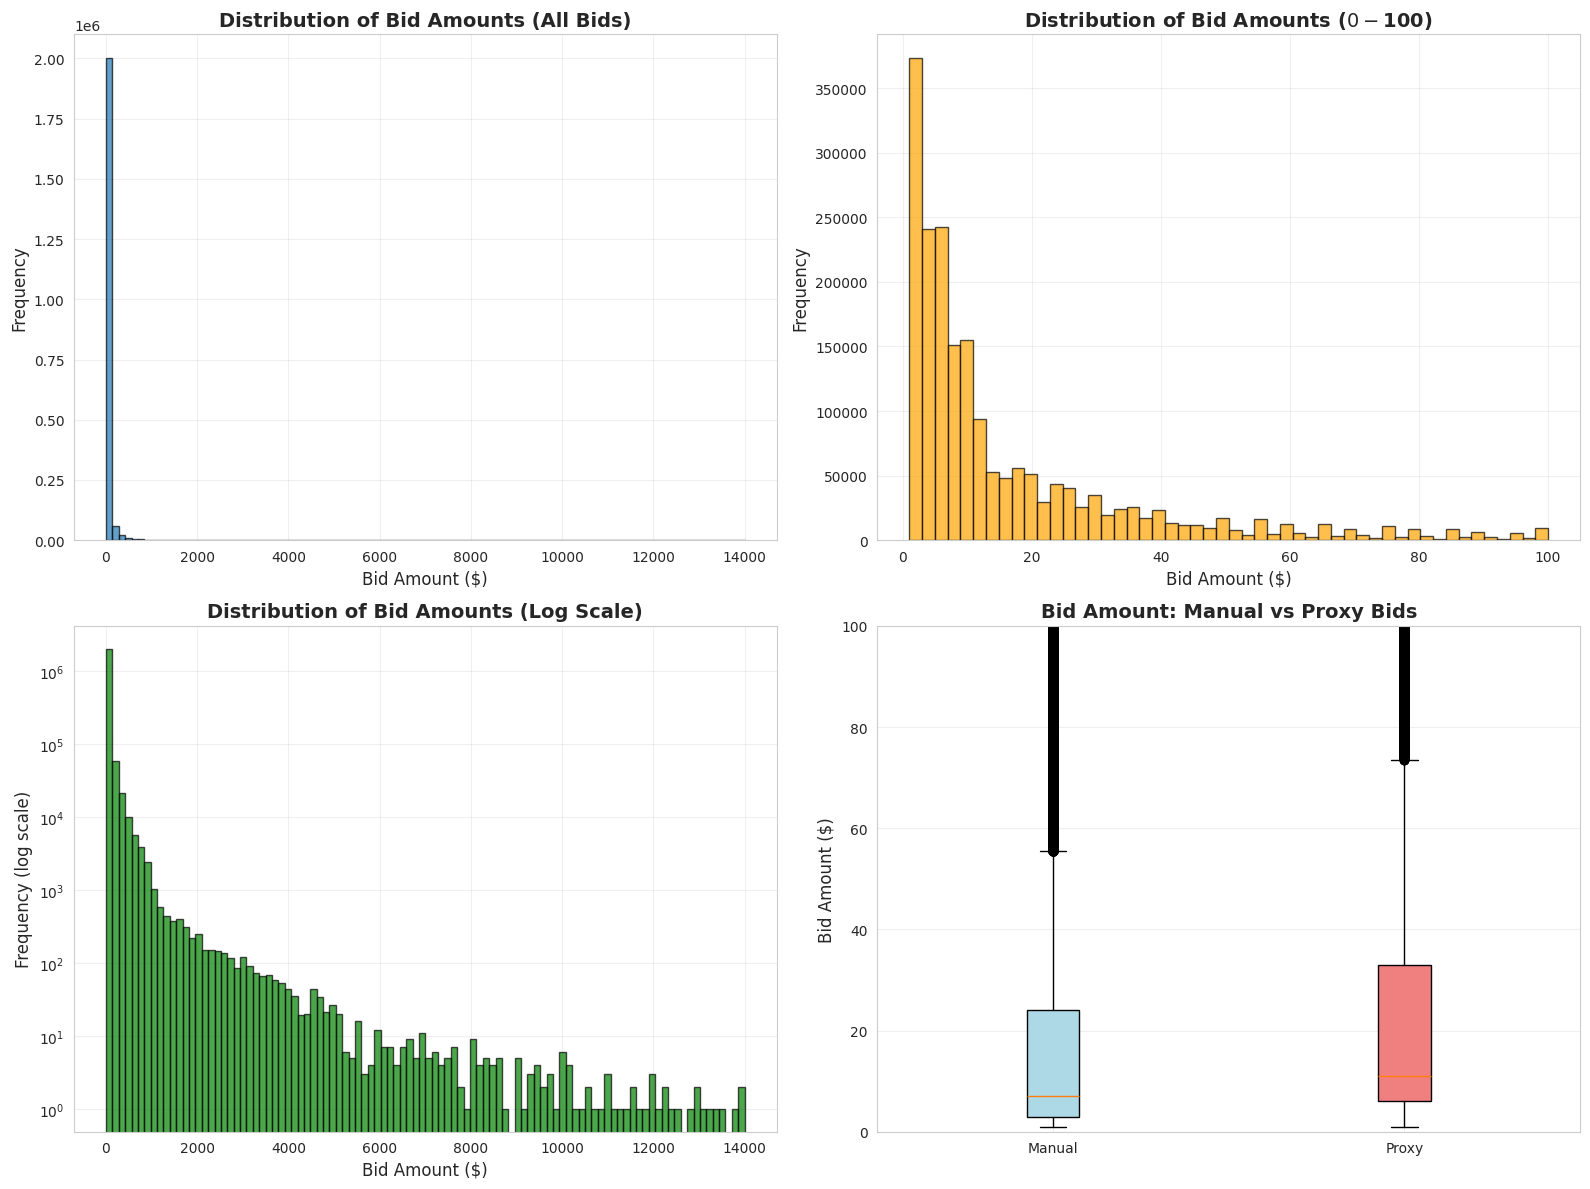


Manual vs Proxy Bid Statistics:

Manual bids:
  Count: 1,419,714
  Mean: $34.38
  Median: $7.10
  Std: $146.45

Proxy bids:
  Count: 687,533
  Mean: $45.79
  Median: $11.00
  Std: $172.10


In [5]:
# Bid Amount Distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histogram of bid amounts (all data)
axes[0, 0].hist(df['amount'], bins=100, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Bid Amount ($)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Distribution of Bid Amounts (All Bids)', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Histogram (zoomed to $0-$100)
axes[0, 1].hist(df[df['amount'] <= 100]['amount'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_xlabel('Bid Amount ($)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('Distribution of Bid Amounts ($0-$100)', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Log scale histogram
axes[1, 0].hist(df[df['amount'] > 0]['amount'], bins=100, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_xlabel('Bid Amount ($)', fontsize=12)
axes[1, 0].set_ylabel('Frequency (log scale)', fontsize=12)
axes[1, 0].set_title('Distribution of Bid Amounts (Log Scale)', fontsize=14, fontweight='bold')
axes[1, 0].set_yscale('log')
axes[1, 0].grid(True, alpha=0.3)

# 4. Box plot by proxy vs manual
proxy_data = [df[df['isproxy'] == False]['amount'], df[df['isproxy'] == True]['amount']]
bp = axes[1, 1].boxplot(proxy_data, labels=['Manual', 'Proxy'], patch_artist=True)
for patch, color in zip(bp['boxes'], ['lightblue', 'lightcoral']):
    patch.set_facecolor(color)
axes[1, 1].set_ylabel('Bid Amount ($)', fontsize=12)
axes[1, 1].set_title('Bid Amount: Manual vs Proxy Bids', fontsize=14, fontweight='bold')
axes[1, 1].set_ylim(0, 100)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics comparison
print("\nManual vs Proxy Bid Statistics:")
print("="*80)
print("\nManual bids:")
manual_bids = df[df['isproxy'] == False]['amount']
print(f"  Count: {len(manual_bids):,}")
print(f"  Mean: ${manual_bids.mean():.2f}")
print(f"  Median: ${manual_bids.median():.2f}")
print(f"  Std: ${manual_bids.std():.2f}")

print("\nProxy bids:")
proxy_bids = df[df['isproxy'] == True]['amount']
print(f"  Count: {len(proxy_bids):,}")
print(f"  Mean: ${proxy_bids.mean():.2f}")
print(f"  Median: ${proxy_bids.median():.2f}")
print(f"  Std: ${proxy_bids.std():.2f}")

BIDDING PATTERNS BY BID SEQUENCE

Bid statistics by sequence number (top 20):
 bid_number  count      mean  median        std
          1 210303 29.240288    9.00 115.888214
          2 178537 31.898112   10.01 122.906315
          3 164151 31.923133   10.00 124.549922
          4 151240 31.881850   10.00 126.653378
          5 139632 31.565690    9.99 128.331322
          6 127815 31.670981    9.00 130.868862
          7 116840 31.636623    8.50 133.409108
          8 106235 31.932420    8.00 136.579445
          9  96971 31.954187    8.00 139.043535
         10  88015 32.291250    7.00 142.474952
         11  79488 32.689122    7.00 145.636586
         12  70721 33.731175    7.00 150.535286
         13  62372 35.047044    7.00 156.549101
         14  54587 36.809249    8.00 161.361345
         15  47956 38.466549    8.00 167.687562
         16  42120 40.423104    8.00 174.002904
         17  37191 42.168784    8.03 180.016756
         18  32975 44.026900    9.00 185.343376
         1

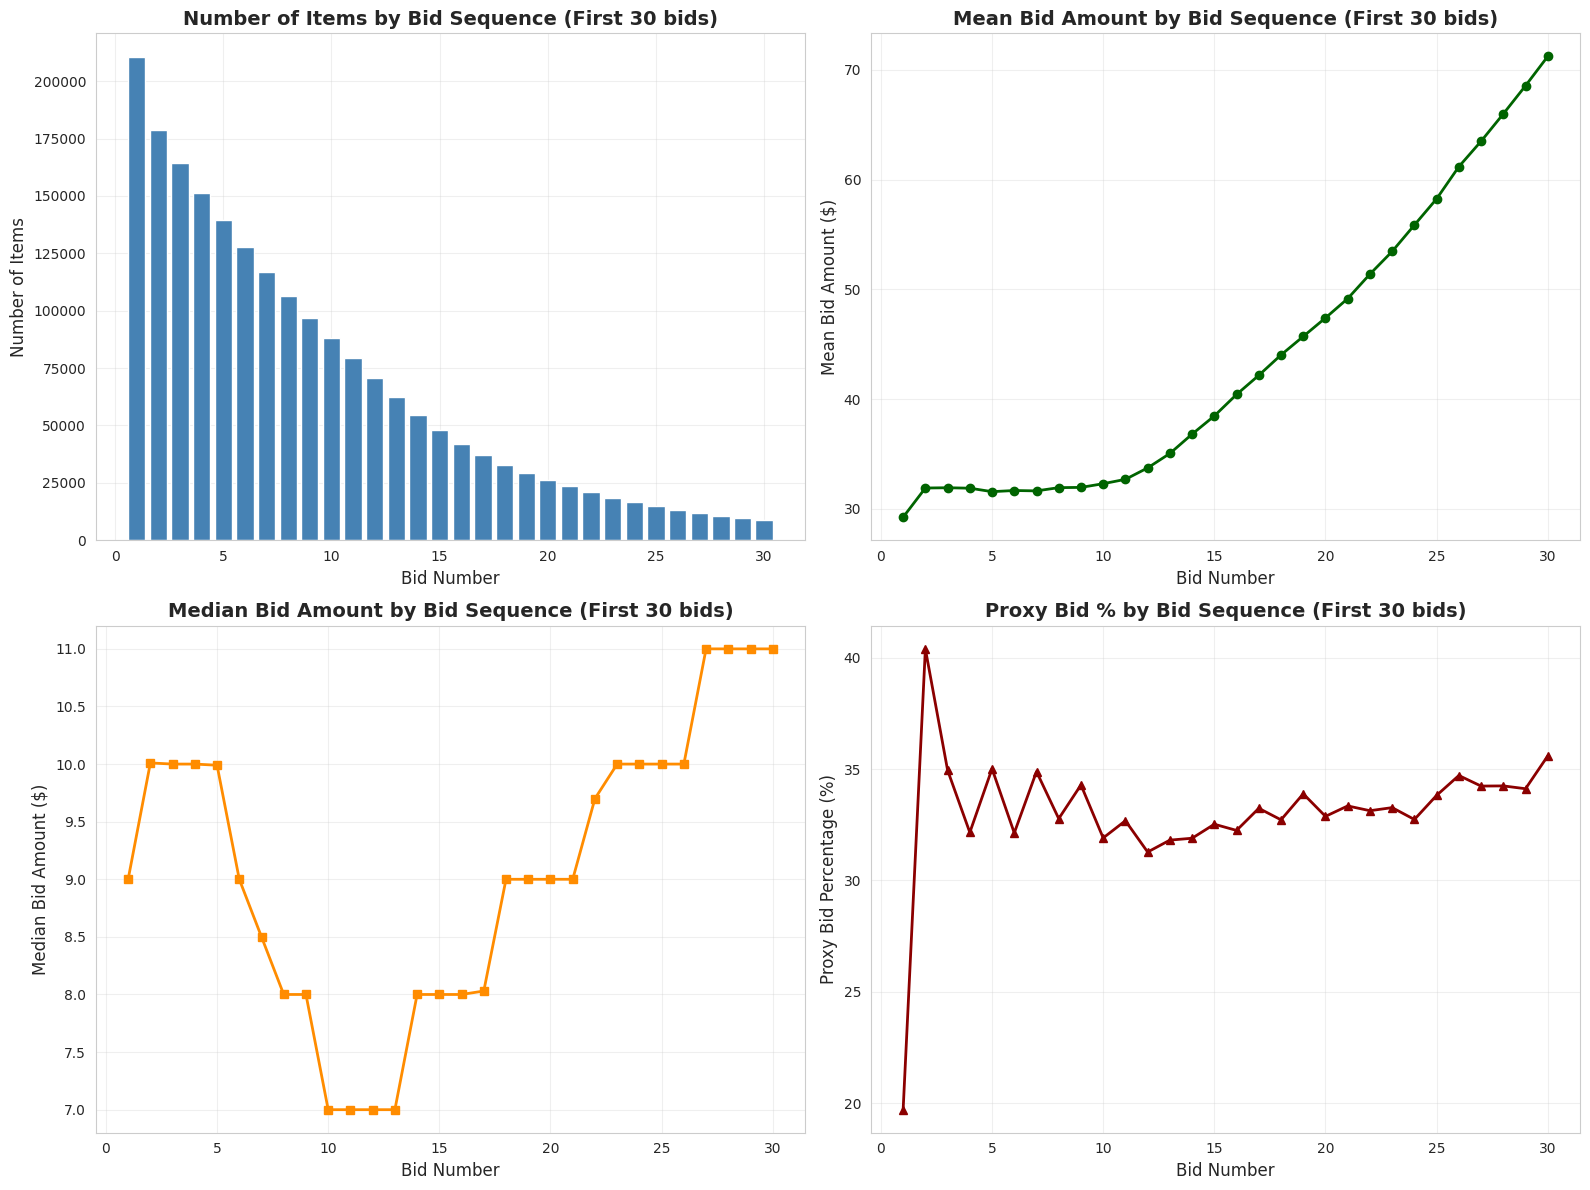

In [6]:
# Bidding Patterns by Bid Sequence Number
print("="*80)
print("BIDDING PATTERNS BY BID SEQUENCE")
print("="*80)

# Analyze bid amounts by bid number
bid_sequence_stats = df.groupby('bid_number')['amount'].agg(['count', 'mean', 'median', 'std']).reset_index()
bid_sequence_stats = bid_sequence_stats[bid_sequence_stats['count'] >= 10]  # Only show if 10+ items

print("\nBid statistics by sequence number (top 20):")
print(bid_sequence_stats.head(20).to_string(index=False))

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Number of items by bid number
axes[0, 0].bar(bid_sequence_stats['bid_number'][:30], bid_sequence_stats['count'][:30], color='steelblue')
axes[0, 0].set_xlabel('Bid Number', fontsize=12)
axes[0, 0].set_ylabel('Number of Items', fontsize=12)
axes[0, 0].set_title('Number of Items by Bid Sequence (First 30 bids)', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Mean bid amount by bid number
axes[0, 1].plot(bid_sequence_stats['bid_number'][:30], bid_sequence_stats['mean'][:30], 
                marker='o', linewidth=2, markersize=6, color='darkgreen')
axes[0, 1].set_xlabel('Bid Number', fontsize=12)
axes[0, 1].set_ylabel('Mean Bid Amount ($)', fontsize=12)
axes[0, 1].set_title('Mean Bid Amount by Bid Sequence (First 30 bids)', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Median bid amount by bid number
axes[1, 0].plot(bid_sequence_stats['bid_number'][:30], bid_sequence_stats['median'][:30], 
                marker='s', linewidth=2, markersize=6, color='darkorange')
axes[1, 0].set_xlabel('Bid Number', fontsize=12)
axes[1, 0].set_ylabel('Median Bid Amount ($)', fontsize=12)
axes[1, 0].set_title('Median Bid Amount by Bid Sequence (First 30 bids)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Proxy bid percentage by bid number
proxy_by_seq = df.groupby('bid_number')['isproxy'].mean() * 100
proxy_seq_df = proxy_by_seq.reset_index()
proxy_seq_df.columns = ['bid_number', 'proxy_pct']
proxy_seq_df = proxy_seq_df[proxy_seq_df['bid_number'] <= 30]

axes[1, 1].plot(proxy_seq_df['bid_number'], proxy_seq_df['proxy_pct'], 
                marker='^', linewidth=2, markersize=6, color='darkred')
axes[1, 1].set_xlabel('Bid Number', fontsize=12)
axes[1, 1].set_ylabel('Proxy Bid Percentage (%)', fontsize=12)
axes[1, 1].set_title('Proxy Bid % by Bid Sequence (First 30 bids)', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

TEMPORAL ANALYSIS - BID TIMING

Bid time range:
  First bid: 2021-10-15 16:05:23-05:00
  Last bid: 2025-11-30 21:06:19-05:00
  Duration: 1507 days 05:00:56

Bids by hour of day:
hour
0      23504
1      13898
2       8915
3       7078
4       8700
5      18941
6      33714
7      49725
8      67268
9      70011
10     64639
11     63873
12     63964
13     67489
14     78331
15     84221
16     99133
17    133852
18    273730
19    453872
20    216116
21     97986
22     66276
23     42011

Bids by day of week:
day_name
Monday       217607
Tuesday      273340
Wednesday    372500
Thursday     534834
Friday       292246
Saturday     175553
Sunday       241167


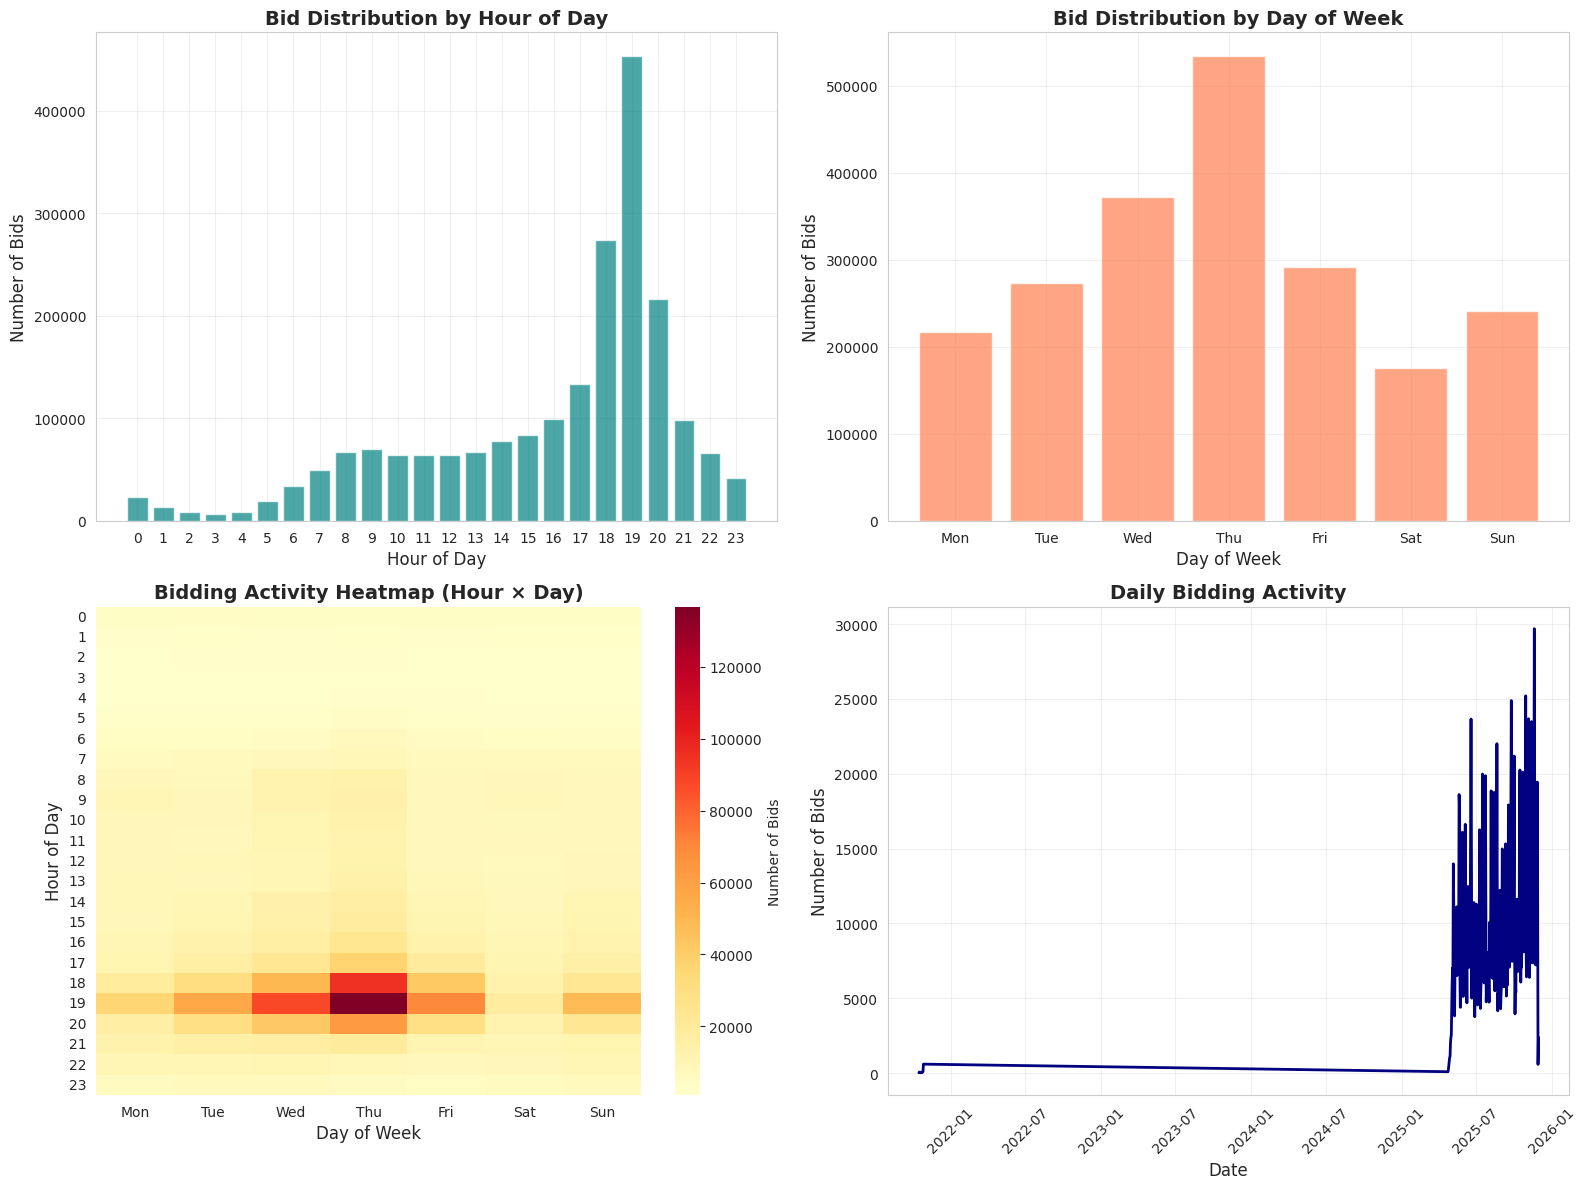

In [7]:
# Temporal Analysis - When do bids occur?
print("="*80)
print("TEMPORAL ANALYSIS - BID TIMING")
print("="*80)

# Extract temporal features
df['hour'] = df['time_of_bid'].dt.hour
df['day_of_week'] = df['time_of_bid'].dt.dayofweek
df['day_name'] = df['time_of_bid'].dt.day_name()
df['date'] = df['time_of_bid'].dt.date

print(f"\nBid time range:")
print(f"  First bid: {df['time_of_bid'].min()}")
print(f"  Last bid: {df['time_of_bid'].max()}")
print(f"  Duration: {df['time_of_bid'].max() - df['time_of_bid'].min()}")

# Bids by hour of day
bids_by_hour = df.groupby('hour').size()
print(f"\nBids by hour of day:")
print(bids_by_hour.to_string())

# Bids by day of week
bids_by_dow = df.groupby('day_name').size().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
print(f"\nBids by day of week:")
print(bids_by_dow.to_string())

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Bids by hour of day
axes[0, 0].bar(bids_by_hour.index, bids_by_hour.values, color='teal', alpha=0.7)
axes[0, 0].set_xlabel('Hour of Day', fontsize=12)
axes[0, 0].set_ylabel('Number of Bids', fontsize=12)
axes[0, 0].set_title('Bid Distribution by Hour of Day', fontsize=14, fontweight='bold')
axes[0, 0].set_xticks(range(24))
axes[0, 0].grid(True, alpha=0.3)

# 2. Bids by day of week
axes[0, 1].bar(range(7), bids_by_dow.values, color='coral', alpha=0.7)
axes[0, 1].set_xlabel('Day of Week', fontsize=12)
axes[0, 1].set_ylabel('Number of Bids', fontsize=12)
axes[0, 1].set_title('Bid Distribution by Day of Week', fontsize=14, fontweight='bold')
axes[0, 1].set_xticks(range(7))
axes[0, 1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axes[0, 1].grid(True, alpha=0.3)

# 3. Heatmap: Hour x Day of Week
hour_dow_pivot = df.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)
hour_dow_pivot.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.heatmap(hour_dow_pivot.T, cmap='YlOrRd', annot=False, fmt='d', ax=axes[1, 0], cbar_kws={'label': 'Number of Bids'})
axes[1, 0].set_xlabel('Day of Week', fontsize=12)
axes[1, 0].set_ylabel('Hour of Day', fontsize=12)
axes[1, 0].set_title('Bidding Activity Heatmap (Hour × Day)', fontsize=14, fontweight='bold')

# 4. Bids over time (daily)
bids_by_date = df.groupby('date').size()
axes[1, 1].plot(bids_by_date.index, bids_by_date.values, linewidth=2, color='navy')
axes[1, 1].set_xlabel('Date', fontsize=12)
axes[1, 1].set_ylabel('Number of Bids', fontsize=12)
axes[1, 1].set_title('Daily Bidding Activity', fontsize=14, fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

ITEM-LEVEL BIDDING ANALYSIS

Bids per item statistics:
count    210303.000000
mean         10.020052
std           9.698324
min           1.000000
25%           3.000000
50%           8.000000
75%          14.000000
max         157.000000
Name: bid_count, dtype: float64

Items by bid count:
  Items with 0 bids: N/A (not in bid history)
  Items with 1 bid: 31,766
  Items with 2-5 bids: 50,722
  Items with 6-10 bids: 48,327
  Items with 11-20 bids: 56,044
  Items with 21+ bids: 23,444

Top 20 items by bid count:
item_id  bid_count
7208367        157
7405626        145
7405622        144
7405629        143
7008880        142
7164454        142
7230764        140
7286374        137
7039549        136
7442660        134
7151784        133
6960627        132
7405666        132
7409856        132
7111539        130
7464728        130
7442604        127
7378810        126
7032671        125
7101574        125


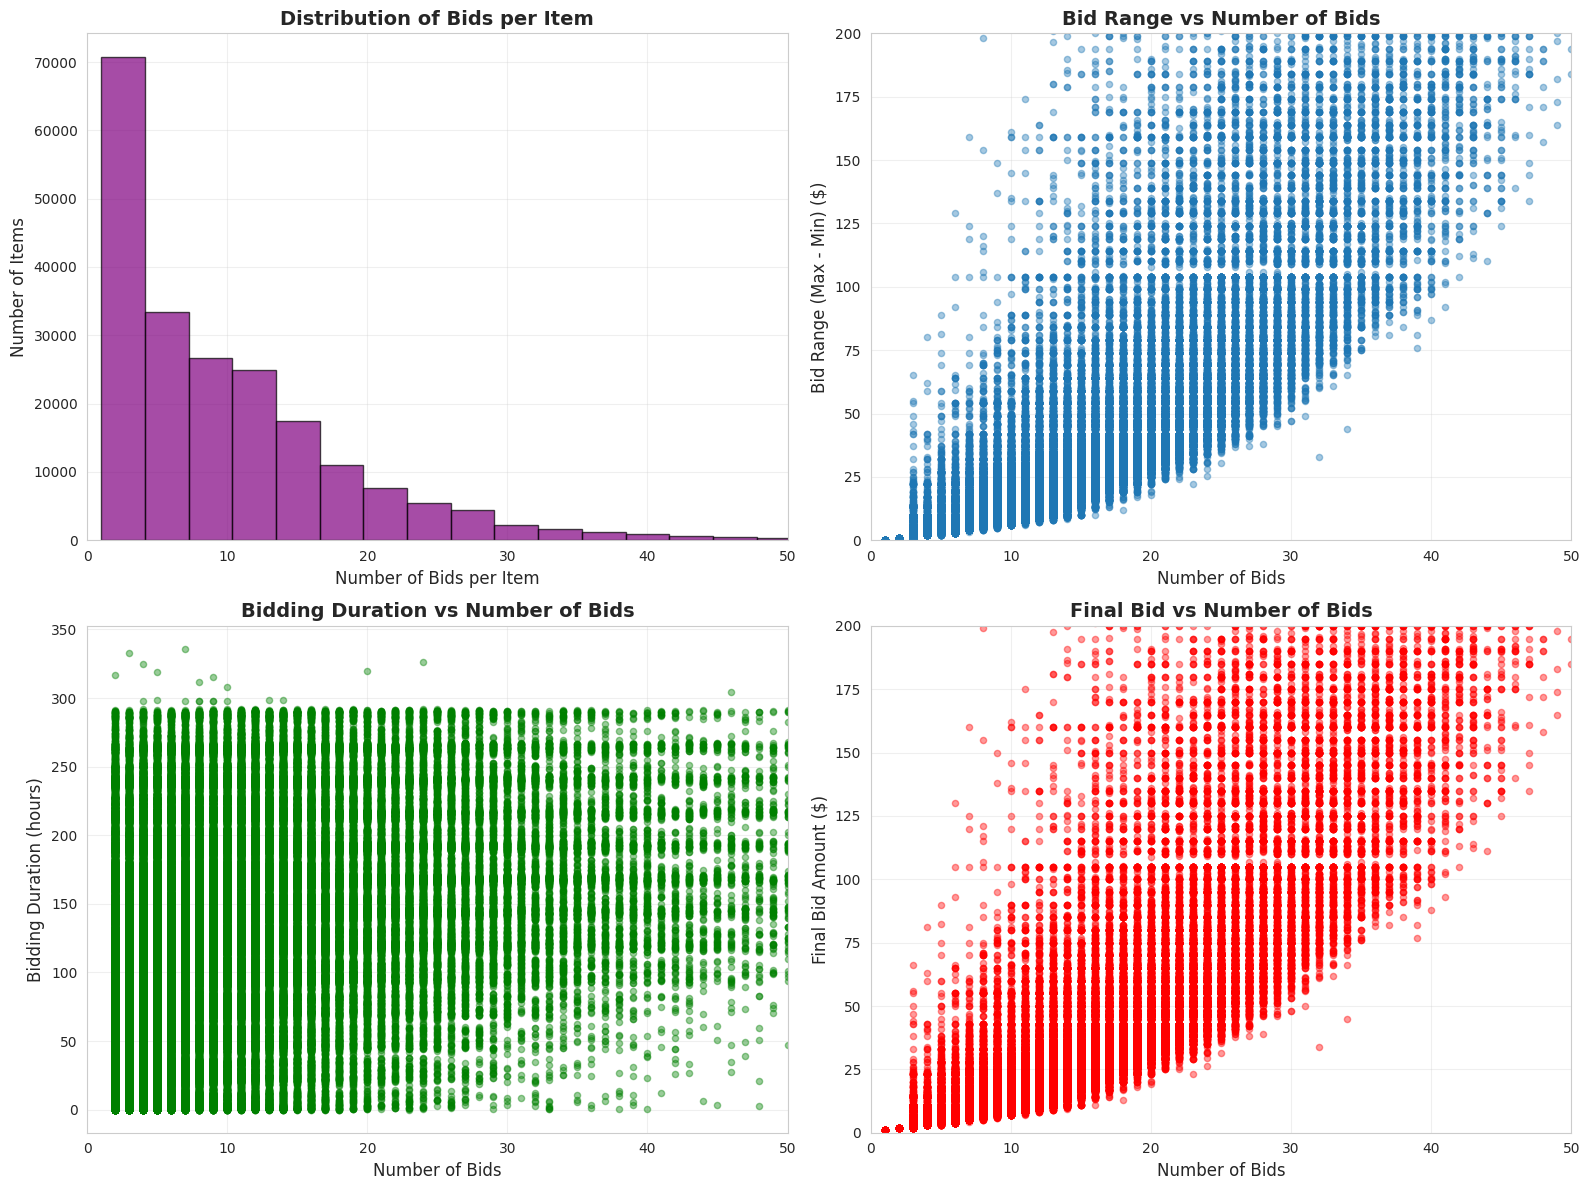


CORRELATIONS

Correlation between bid count and other metrics:
  Bid count vs Final bid: 0.5995
  Bid count vs Bid range: 0.5995
  Bid count vs Duration: 0.4661
  Bid count vs Proxy %: 0.5754


In [8]:
# Item-Level Analysis
print("="*80)
print("ITEM-LEVEL BIDDING ANALYSIS")
print("="*80)

# Bids per item
bids_per_item = df.groupby('item_id').size().reset_index(name='bid_count')

print(f"\nBids per item statistics:")
print(bids_per_item['bid_count'].describe())

print(f"\nItems by bid count:")
print(f"  Items with 0 bids: N/A (not in bid history)")
print(f"  Items with 1 bid: {(bids_per_item['bid_count'] == 1).sum():,}")
print(f"  Items with 2-5 bids: {((bids_per_item['bid_count'] >= 2) & (bids_per_item['bid_count'] <= 5)).sum():,}")
print(f"  Items with 6-10 bids: {((bids_per_item['bid_count'] >= 6) & (bids_per_item['bid_count'] <= 10)).sum():,}")
print(f"  Items with 11-20 bids: {((bids_per_item['bid_count'] >= 11) & (bids_per_item['bid_count'] <= 20)).sum():,}")
print(f"  Items with 21+ bids: {(bids_per_item['bid_count'] >= 21).sum():,}")

# Top items by bid count
print(f"\nTop 20 items by bid count:")
top_items = bids_per_item.nlargest(20, 'bid_count')
print(top_items.to_string(index=False))

# Merge bid stats with item data
item_stats = df.groupby('item_id').agg({
    'amount': ['min', 'max', 'mean', 'count'],
    'isproxy': 'sum',
    'time_of_bid': ['min', 'max']
}).reset_index()
item_stats.columns = ['item_id', 'min_bid', 'max_bid', 'mean_bid', 'bid_count', 'proxy_count', 'first_bid_time', 'last_bid_time']
item_stats['bid_range'] = item_stats['max_bid'] - item_stats['min_bid']
item_stats['duration_hours'] = (item_stats['last_bid_time'] - item_stats['first_bid_time']).dt.total_seconds() / 3600
item_stats['proxy_pct'] = 100 * item_stats['proxy_count'] / item_stats['bid_count']

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribution of bids per item
axes[0, 0].hist(bids_per_item['bid_count'], bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[0, 0].set_xlabel('Number of Bids per Item', fontsize=12)
axes[0, 0].set_ylabel('Number of Items', fontsize=12)
axes[0, 0].set_title('Distribution of Bids per Item', fontsize=14, fontweight='bold')
axes[0, 0].set_xlim(0, 50)
axes[0, 0].grid(True, alpha=0.3)

# 2. Bid range vs bid count
axes[0, 1].scatter(item_stats['bid_count'], item_stats['bid_range'], alpha=0.4, s=20)
axes[0, 1].set_xlabel('Number of Bids', fontsize=12)
axes[0, 1].set_ylabel('Bid Range (Max - Min) ($)', fontsize=12)
axes[0, 1].set_title('Bid Range vs Number of Bids', fontsize=14, fontweight='bold')
axes[0, 1].set_xlim(0, 50)
axes[0, 1].set_ylim(0, 200)
axes[0, 1].grid(True, alpha=0.3)

# 3. Bidding duration vs bid count
valid_duration = item_stats[item_stats['duration_hours'] > 0]
axes[1, 0].scatter(valid_duration['bid_count'], valid_duration['duration_hours'], alpha=0.4, s=20, color='green')
axes[1, 0].set_xlabel('Number of Bids', fontsize=12)
axes[1, 0].set_ylabel('Bidding Duration (hours)', fontsize=12)
axes[1, 0].set_title('Bidding Duration vs Number of Bids', fontsize=14, fontweight='bold')
axes[1, 0].set_xlim(0, 50)
axes[1, 0].grid(True, alpha=0.3)

# 4. Final bid amount vs bid count
axes[1, 1].scatter(item_stats['bid_count'], item_stats['max_bid'], alpha=0.4, s=20, color='red')
axes[1, 1].set_xlabel('Number of Bids', fontsize=12)
axes[1, 1].set_ylabel('Final Bid Amount ($)', fontsize=12)
axes[1, 1].set_title('Final Bid vs Number of Bids', fontsize=14, fontweight='bold')
axes[1, 1].set_xlim(0, 50)
axes[1, 1].set_ylim(0, 200)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation analysis
print("\n" + "="*80)
print("CORRELATIONS")
print("="*80)
print("\nCorrelation between bid count and other metrics:")
print(f"  Bid count vs Final bid: {item_stats['bid_count'].corr(item_stats['max_bid']):.4f}")
print(f"  Bid count vs Bid range: {item_stats['bid_count'].corr(item_stats['bid_range']):.4f}")
print(f"  Bid count vs Duration: {item_stats['bid_count'].corr(item_stats['duration_hours']):.4f}")
print(f"  Bid count vs Proxy %: {item_stats['bid_count'].corr(item_stats['proxy_pct']):.4f}")

AUCTION-LEVEL ANALYSIS

Auction statistics:
       unique_items  total_bid_value     mean_bid   median_bid   total_bids  \
count   1914.000000     1.914000e+03  1914.000000  1914.000000  1914.000000   
mean     109.876176     4.194933e+04    30.041689    10.786951  1100.964995   
std       52.747293     1.152661e+05    38.051033    13.363828   758.515437   
min        1.000000     6.800000e+01     1.456140     1.000000    27.000000   
25%       69.000000     8.140320e+03    11.343998     6.000000   586.000000   
50%      104.000000     1.711272e+04    18.926573     8.000000   934.000000   
75%      154.000000     4.038582e+04    33.382403    11.000000  1428.750000   
max      200.000000     3.422351e+06   501.921569   390.000000  8328.000000   

       proxy_bids  proxy_pct  duration_days  bids_per_item  
count      1914.0     1914.0    1914.000000    1914.000000  
mean   359.212644  31.563516       8.084717      10.460604  
std    277.369179   4.522133       2.107411       5.199424  


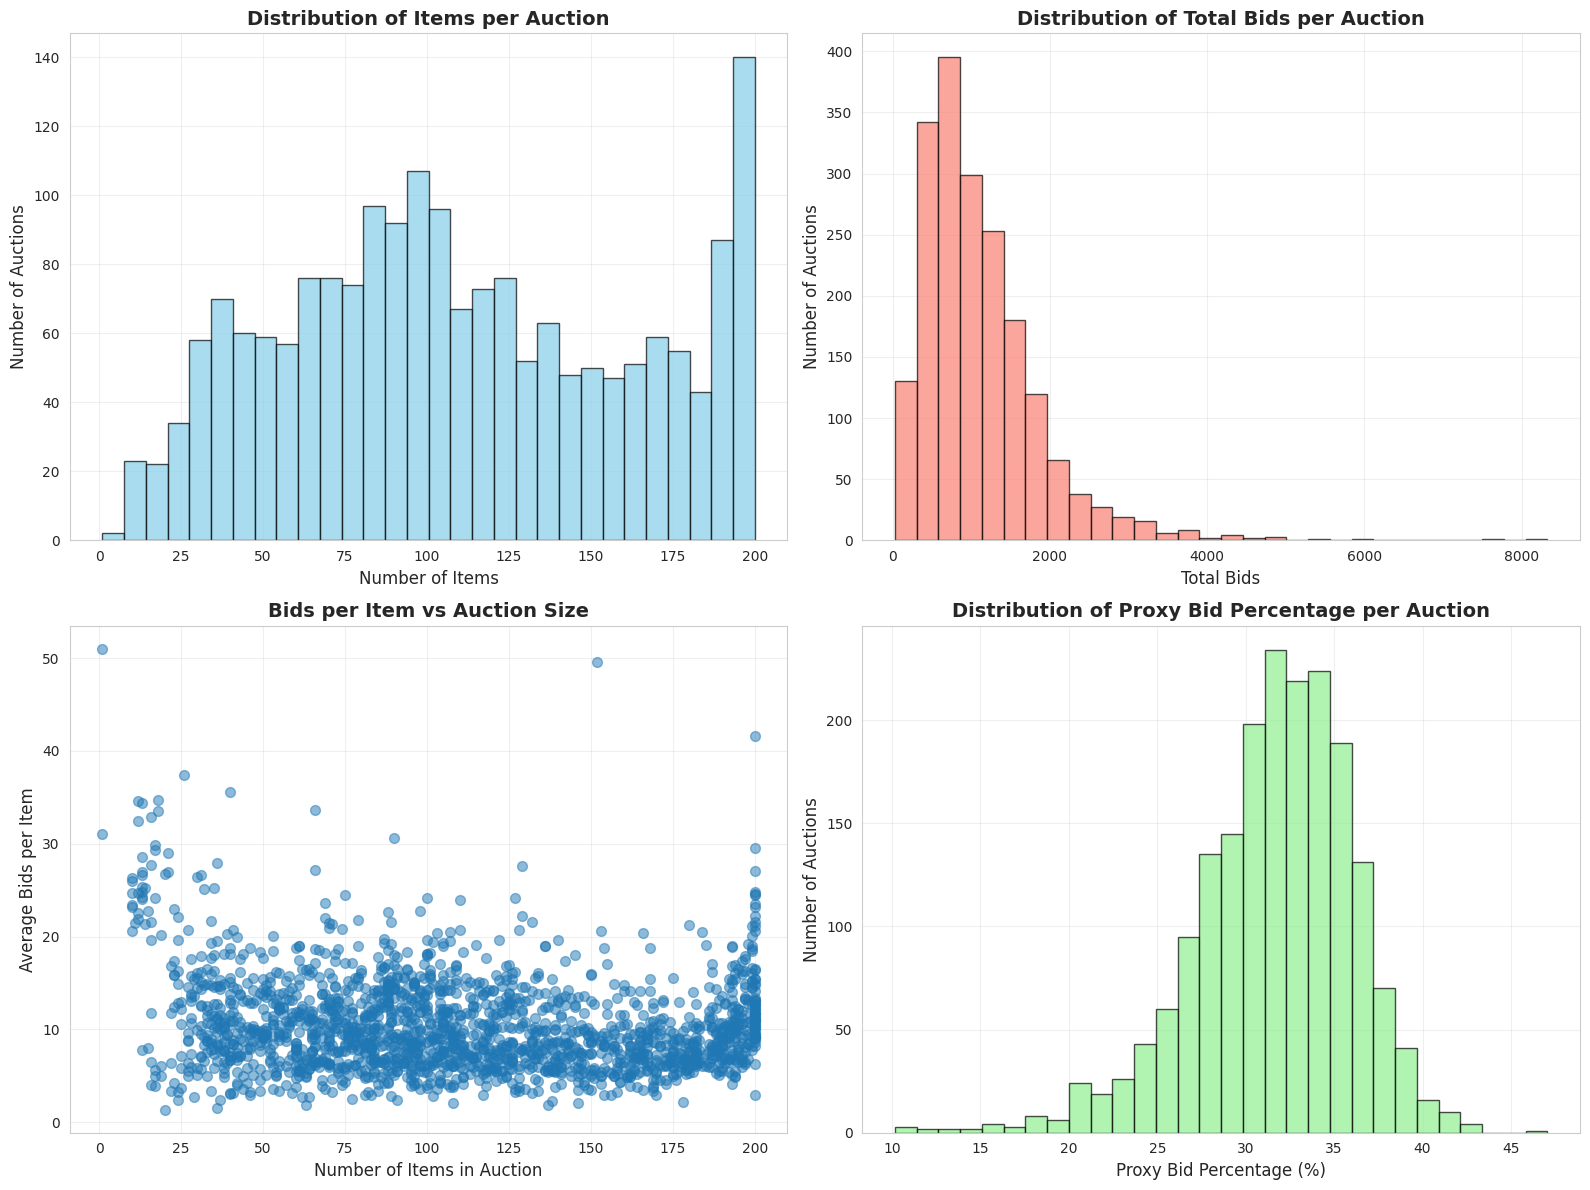

In [9]:
# Auction-Level Analysis
print("="*80)
print("AUCTION-LEVEL ANALYSIS")
print("="*80)

# Aggregate by auction
auction_stats = df.groupby('auction_id').agg({
    'item_id': 'nunique',
    'amount': ['sum', 'mean', 'median', 'count'],
    'isproxy': 'sum',
    'time_of_bid': ['min', 'max']
}).reset_index()
auction_stats.columns = ['auction_id', 'unique_items', 'total_bid_value', 'mean_bid', 'median_bid', 
                          'total_bids', 'proxy_bids', 'first_bid', 'last_bid']
auction_stats['proxy_pct'] = 100 * auction_stats['proxy_bids'] / auction_stats['total_bids']
auction_stats['duration_days'] = (auction_stats['last_bid'] - auction_stats['first_bid']).dt.total_seconds() / 86400
auction_stats['bids_per_item'] = auction_stats['total_bids'] / auction_stats['unique_items']

print(f"\nAuction statistics:")
print(auction_stats.describe())

print(f"\nTop 10 auctions by total bids:")
print(auction_stats.nlargest(10, 'total_bids')[['auction_id', 'unique_items', 'total_bids', 'mean_bid', 'proxy_pct']].to_string(index=False))

print(f"\nTop 10 auctions by total bid value:")
print(auction_stats.nlargest(10, 'total_bid_value')[['auction_id', 'unique_items', 'total_bid_value', 'total_bids']].to_string(index=False))

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Items per auction
axes[0, 0].hist(auction_stats['unique_items'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].set_xlabel('Number of Items', fontsize=12)
axes[0, 0].set_ylabel('Number of Auctions', fontsize=12)
axes[0, 0].set_title('Distribution of Items per Auction', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Total bids per auction
axes[0, 1].hist(auction_stats['total_bids'], bins=30, edgecolor='black', alpha=0.7, color='salmon')
axes[0, 1].set_xlabel('Total Bids', fontsize=12)
axes[0, 1].set_ylabel('Number of Auctions', fontsize=12)
axes[0, 1].set_title('Distribution of Total Bids per Auction', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Bids per item vs items per auction
axes[1, 0].scatter(auction_stats['unique_items'], auction_stats['bids_per_item'], alpha=0.5, s=50)
axes[1, 0].set_xlabel('Number of Items in Auction', fontsize=12)
axes[1, 0].set_ylabel('Average Bids per Item', fontsize=12)
axes[1, 0].set_title('Bids per Item vs Auction Size', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Proxy bid percentage distribution
axes[1, 1].hist(auction_stats['proxy_pct'], bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 1].set_xlabel('Proxy Bid Percentage (%)', fontsize=12)
axes[1, 1].set_ylabel('Number of Auctions', fontsize=12)
axes[1, 1].set_title('Distribution of Proxy Bid Percentage per Auction', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

BID INCREMENT ANALYSIS

Bid increment statistics:
count    1.896944e+06
mean    -3.130834e+00
std      7.527987e+00
min     -1.900000e+03
25%     -3.000000e+00
50%     -1.000000e+00
75%     -1.000000e+00
max      0.000000e+00
Name: bid_increment, dtype: float64

Bid increment distribution:
  Increments $0-$1: 0
  Increments $1-$5: 0
  Increments $5-$10: 0
  Increments $10-$20: 0
  Increments $20+: 0


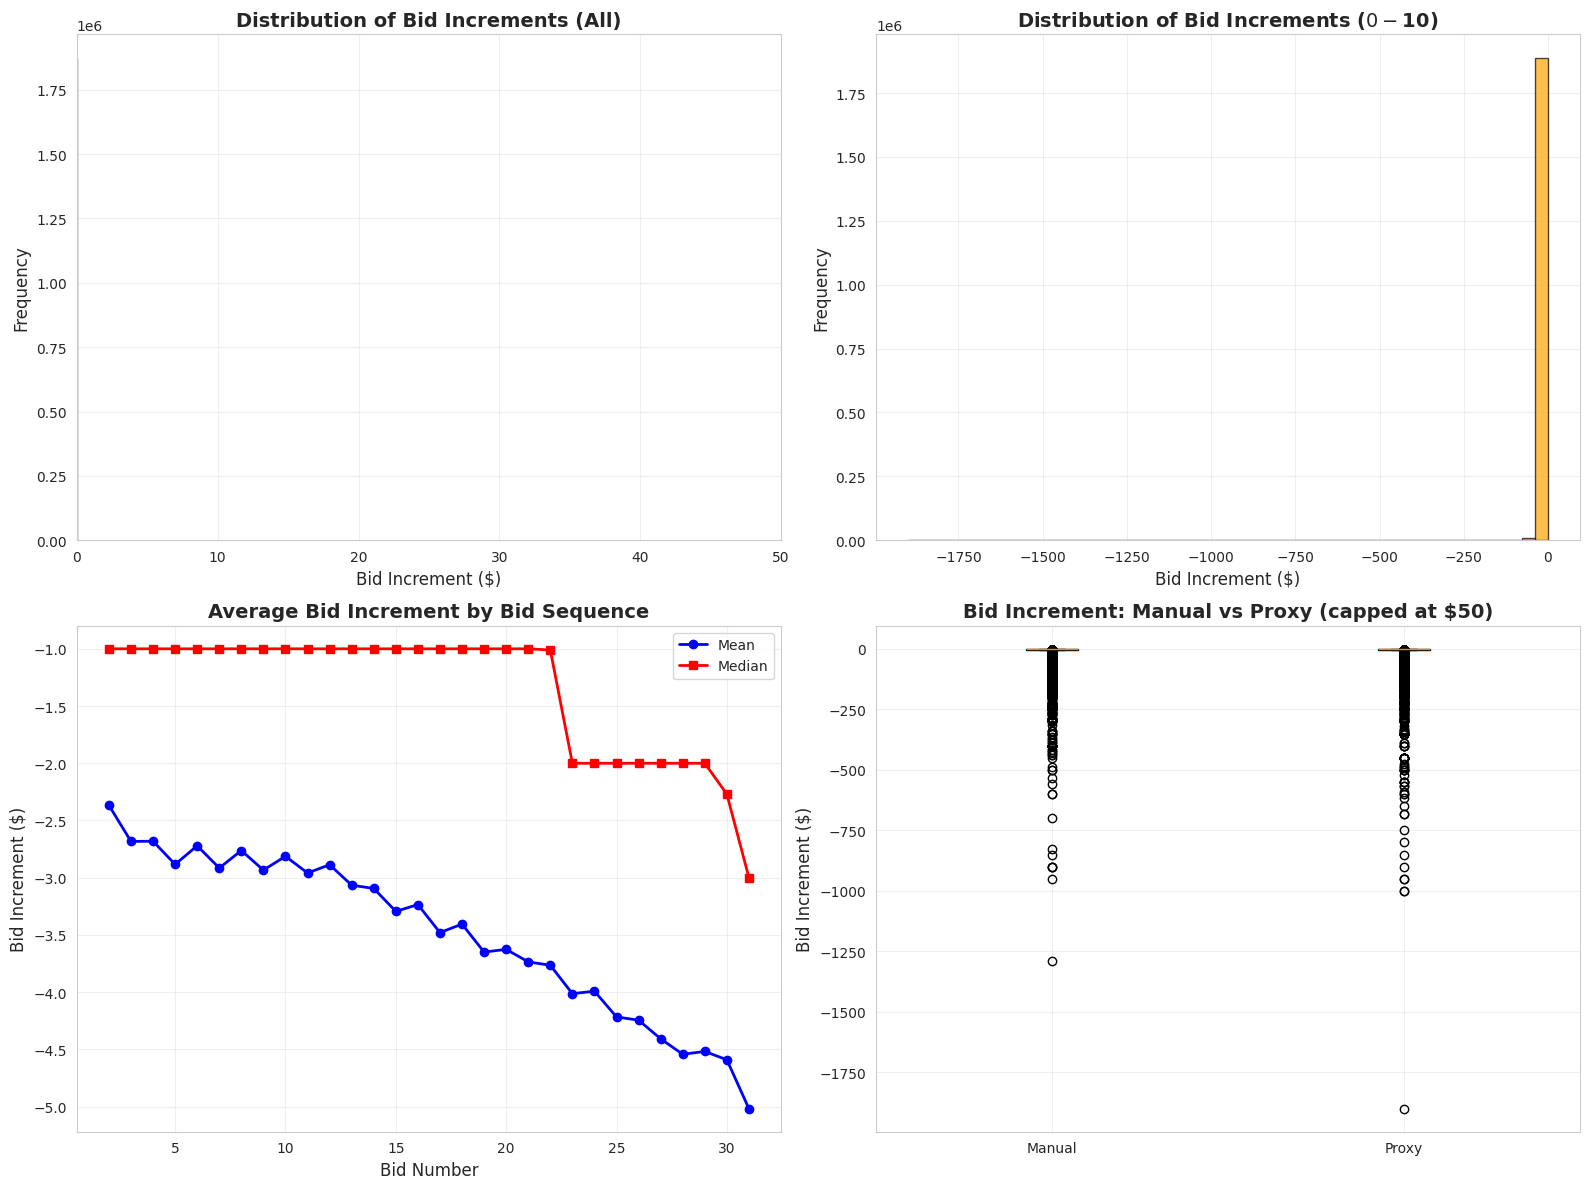


Increment comparison (Manual vs Proxy):
  Manual - Mean: $-2.85, Median: $-1.00
  Proxy - Mean: $-3.68, Median: $-2.00


In [10]:
# Bid Increment Analysis
print("="*80)
print("BID INCREMENT ANALYSIS")
print("="*80)

# Calculate bid increments for each item
df_sorted = df.sort_values(['item_id', 'bid_number'])
df_sorted['bid_increment'] = df_sorted.groupby('item_id')['amount'].diff()

# Remove first bid (no increment)
increments = df_sorted[df_sorted['bid_increment'].notna()].copy()

print(f"\nBid increment statistics:")
print(increments['bid_increment'].describe())

print(f"\nBid increment distribution:")
print(f"  Increments $0-$1: {((increments['bid_increment'] > 0) & (increments['bid_increment'] <= 1)).sum():,}")
print(f"  Increments $1-$5: {((increments['bid_increment'] > 1) & (increments['bid_increment'] <= 5)).sum():,}")
print(f"  Increments $5-$10: {((increments['bid_increment'] > 5) & (increments['bid_increment'] <= 10)).sum():,}")
print(f"  Increments $10-$20: {((increments['bid_increment'] > 10) & (increments['bid_increment'] <= 20)).sum():,}")
print(f"  Increments $20+: {(increments['bid_increment'] > 20).sum():,}")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histogram of bid increments (all)
axes[0, 0].hist(increments['bid_increment'], bins=100, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Bid Increment ($)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Distribution of Bid Increments (All)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlim(0, 50)
axes[0, 0].grid(True, alpha=0.3)

# 2. Histogram of small increments ($0-$10)
small_increments = increments[increments['bid_increment'] <= 10]['bid_increment']
axes[0, 1].hist(small_increments, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_xlabel('Bid Increment ($)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('Distribution of Bid Increments ($0-$10)', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Increment by bid number (showing pattern over bidding sequence)
inc_by_bidnum = increments.groupby('bid_number')['bid_increment'].agg(['mean', 'median', 'count']).reset_index()
inc_by_bidnum = inc_by_bidnum[inc_by_bidnum['count'] >= 10]  # Only if 10+ samples
axes[1, 0].plot(inc_by_bidnum['bid_number'][:30], inc_by_bidnum['mean'][:30], 
                marker='o', linewidth=2, label='Mean', color='blue')
axes[1, 0].plot(inc_by_bidnum['bid_number'][:30], inc_by_bidnum['median'][:30], 
                marker='s', linewidth=2, label='Median', color='red')
axes[1, 0].set_xlabel('Bid Number', fontsize=12)
axes[1, 0].set_ylabel('Bid Increment ($)', fontsize=12)
axes[1, 0].set_title('Average Bid Increment by Bid Sequence', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Increment: proxy vs manual
manual_inc = increments[increments['isproxy'] == False]['bid_increment']
proxy_inc = increments[increments['isproxy'] == True]['bid_increment']
bp = axes[1, 1].boxplot([manual_inc[manual_inc <= 50], proxy_inc[proxy_inc <= 50]], 
                         labels=['Manual', 'Proxy'], patch_artist=True)
for patch, color in zip(bp['boxes'], ['lightblue', 'lightcoral']):
    patch.set_facecolor(color)
axes[1, 1].set_ylabel('Bid Increment ($)', fontsize=12)
axes[1, 1].set_title('Bid Increment: Manual vs Proxy (capped at $50)', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nIncrement comparison (Manual vs Proxy):")
print(f"  Manual - Mean: ${manual_inc.mean():.2f}, Median: ${manual_inc.median():.2f}")
print(f"  Proxy - Mean: ${proxy_inc.mean():.2f}, Median: ${proxy_inc.median():.2f}")

In [11]:
# Summary and Key Insights
print("="*80)
print("SUMMARY AND KEY INSIGHTS")
print("="*80)

print(f"\n1. OVERALL BIDDING ACTIVITY:")
print(f"   • Total bids: {len(df):,}")
print(f"   • Unique auctions: {df['auction_id'].nunique():,}")
print(f"   • Unique items: {df['item_id'].nunique():,}")
print(f"   • Average bids per item: {len(df) / df['item_id'].nunique():.2f}")

print(f"\n2. BID AMOUNTS:")
print(f"   • Mean bid: ${df['amount'].mean():.2f}")
print(f"   • Median bid: ${df['amount'].median():.2f}")
print(f"   • Most common bid range: $1-$10")

print(f"\n3. PROXY BIDDING:")
proxy_pct = 100 * df['isproxy'].sum() / len(df)
print(f"   • Proxy bids: {proxy_pct:.1f}% of all bids")
print(f"   • Manual bids: {100-proxy_pct:.1f}% of all bids")

print(f"\n4. BIDDING PATTERNS:")
peak_hour = bids_by_hour.idxmax()
peak_day = bids_by_dow.idxmax()
print(f"   • Peak bidding hour: {peak_hour}:00")
print(f"   • Peak bidding day: {peak_day}")
print(f"   • Most active bidding period: evenings and weekends")

print(f"\n5. COMPETITION:")
high_competition = (bids_per_item['bid_count'] >= 10).sum()
pct_high = 100 * high_competition / len(bids_per_item)
print(f"   • Items with 10+ bids: {high_competition:,} ({pct_high:.1f}%)")
print(f"   • Items with high competition tend to have higher final prices")

print(f"\n6. BID INCREMENTS:")
print(f"   • Mean increment: ${increments['bid_increment'].mean():.2f}")
print(f"   • Median increment: ${increments['bid_increment'].median():.2f}")
print(f"   • Most common increment: $1-$5")

print(f"\n" + "="*80)
print("Analysis complete!")
print("="*80)

SUMMARY AND KEY INSIGHTS

1. OVERALL BIDDING ACTIVITY:
   • Total bids: 2,107,247
   • Unique auctions: 1,914
   • Unique items: 210,303
   • Average bids per item: 10.02

2. BID AMOUNTS:
   • Mean bid: $38.10
   • Median bid: $9.00
   • Most common bid range: $1-$10

3. PROXY BIDDING:
   • Proxy bids: 32.6% of all bids
   • Manual bids: 67.4% of all bids

4. BIDDING PATTERNS:
   • Peak bidding hour: 19:00
   • Peak bidding day: Thursday
   • Most active bidding period: evenings and weekends

5. COMPETITION:
   • Items with 10+ bids: 88,015 (41.9%)
   • Items with high competition tend to have higher final prices

6. BID INCREMENTS:
   • Mean increment: $-3.13
   • Median increment: $-1.00
   • Most common increment: $1-$5

Analysis complete!
